In [1]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

time = 0.25 
 error = 0.0303


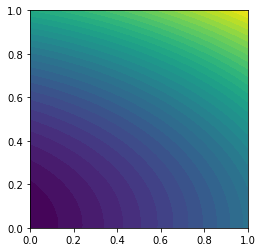

time = 0.50 
 error = 0.0355


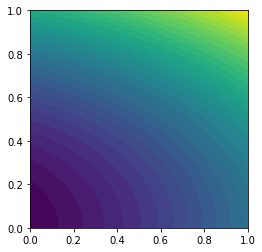

time = 0.75 
 error = 0.0364


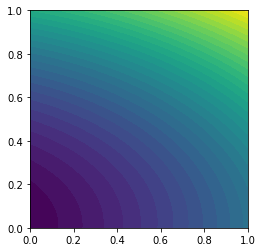

time = 1.00 
 error = 0.0365


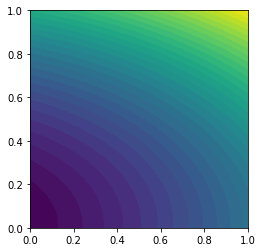

time = 1.25 
 error = 0.0366


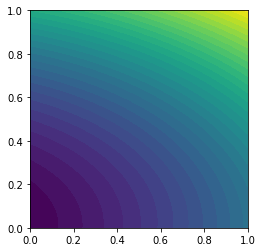

time = 1.50 
 error = 0.0366


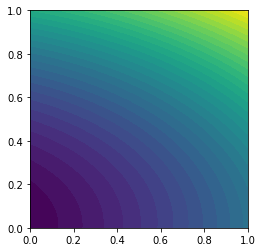

time = 1.75 
 error = 0.0366


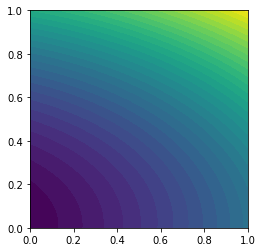

time = 2.00 
 error = 0.0366


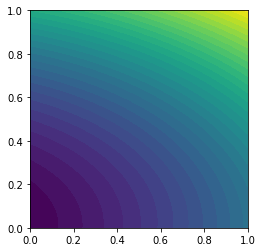

time = 2.25 
 error = 0.0366


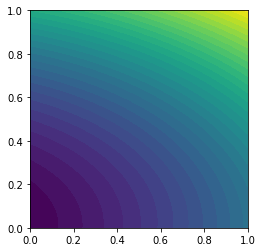

time = 2.50 
 error = 0.0366


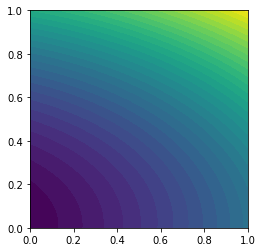

time = 2.75 
 error = 0.0366


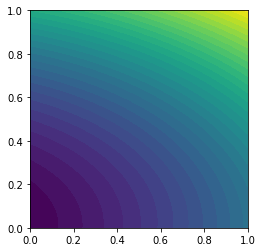

time = 3.00 
 error = 0.0366


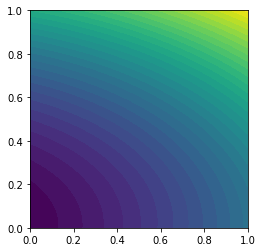

time = 3.25 
 error = 0.0366


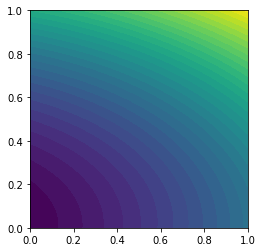

time = 3.50 
 error = 0.0366


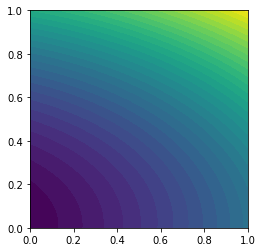

time = 3.75 
 error = 0.0366


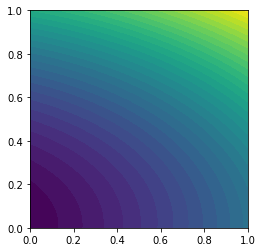

time = 4.00 
 error = 0.0366


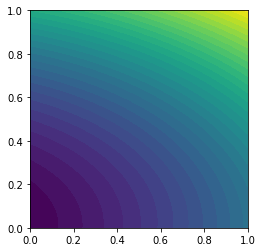

time = 4.25 
 error = 0.0366


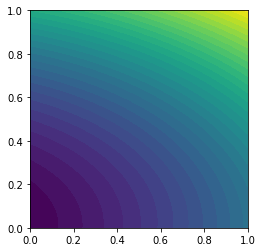

time = 4.50 
 error = 0.0366


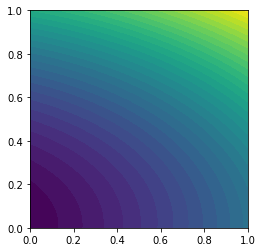

time = 4.75 
 error = 0.0366


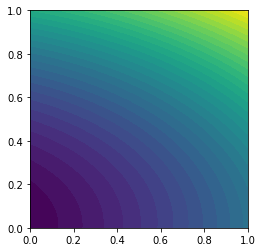

time = 5.00 
 error = 0.0366


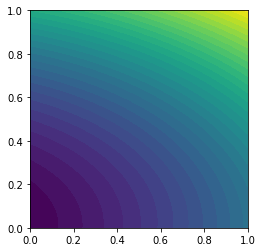

In [3]:
T = 5            # final time
num_steps = 20     # number of time steps
dt = T / num_steps # time step size
alpha = 3          # parameter alpha
beta = 1.2         # parameter beta

# Create mesh and define function space
nx = ny = 80
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('sin(x[0]) + x[0]*x[0] + alpha*x[1]*x[1] + beta*t', degree=2, alpha=alpha, beta=beta, t=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define initial value
u_n = interpolate(u_D, V)
#u_n = project(u_D, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx #Abstract formulation
a, L = lhs(F), rhs(F)

# Time-stepping
u = Function(V)
t = 0

for n in range(num_steps):
    # Update current time
    t = round(t + dt, 2)
    u_D.t = t #Update time parameter at the boundary

    # Compute solution
    solve(a == L, u, bc)  
    
    # Compute error at vertices
    u_e = interpolate(u_D, V)
    error = np.abs(u_e.vector() - u.vector()).max()
    print(' time = %.2f \n error = %.3g' % (t, error))

    # Update previous solution
    u_n.assign(u)
    plot(u)
    plt.show()

In [4]:
@interact
def show_solution_time(t = (dt,T,dt)):
    u_D.t = t
    solve(a == L, u, bc)
    u_n.assign(u)
    return plot(u)

interactive(children=(FloatSlider(value=2.5, description='t', max=5.0, min=0.25, step=0.25), Output()), _dom_c…